# **sars-cov-2 diary** 
### **Date**: 01-04-2021

## **Project**: Genomic Surveillance of Sars-CoV-2 in Kenya
### **PI**: Dr. Samuel Oyola, Senoir Scientist, Genomics

## Introduction
This project will track the evolution of the Sars-CoV-2 within the country. Full virus genomes will be sequenced using both Illumina and Nanopore technologies to, primarily, determine variations (Variant Calling). The data will be inferred against the available metadata to decipher intriguing insights on the virus epidemiology. This notebook will be used to document virtually all my interactions with this project.

My role: Research Associate - Bioiformatics

## Workflow

### Sequencing information 
 - Batch no.: A001
 - Platform: Illumina MiSeq
 - Library preparion: NEB
 - Seq Date: 01-04-2021
 - Number of samples:30

### Sequencing analyses
Raw sequence reads were duplicated to a working copy. Files were renamed using the code snippet below (`rename.sh`):
```bash
#!/usr/bin/env bash

rmsuff1=_L001_R1_001.fastq.gz
rmsuff2=$(sed 's/R1/R2/' <<< ${rmsuff1})
suff1=_1.fastq.gz
suff2=$(sed 's/1/2/' <<< ${suff1})

count=`ls -1 *${rmsuff1} | wc -l`

if [ $count != 0 ];
then
for rd1 in *${rmsuff1}
do
  	base=$(basename ${rd1} ${rmsuff1})
    mv ${rd1} ${base}${suff1}
    mv ${base}${rmsuff2} ${base}${suff2}
done
else
    echo "There is no file with ${rmsuff1} suffix in the directory"
fi
```

# Depth plots across kits

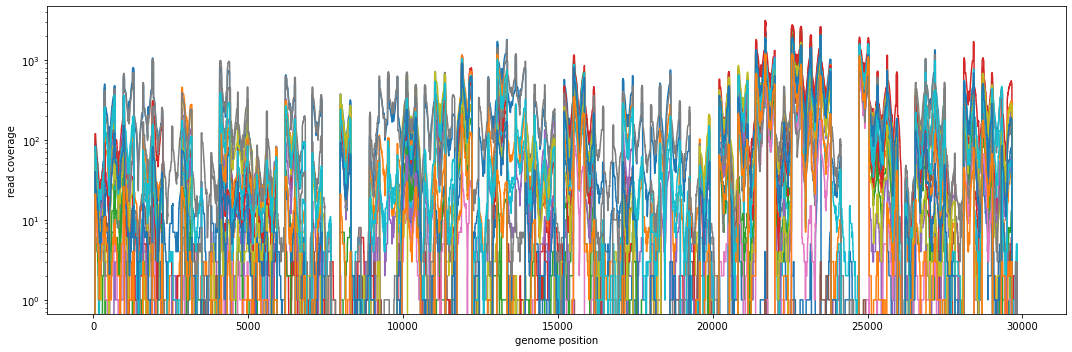

In [9]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
for file in os.listdir('./high_kit/'):
    #print(file)
    df = pd.read_table(f'./high_kit/{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = file.split('_')[1]
    df['no_reads'].plot(logy=True, ax=ax, label=label)
    plt.xlabel('genome position')
    plt.ylabel('read coverage')
    #plt.legend()
plt.tight_layout()
plt.show()


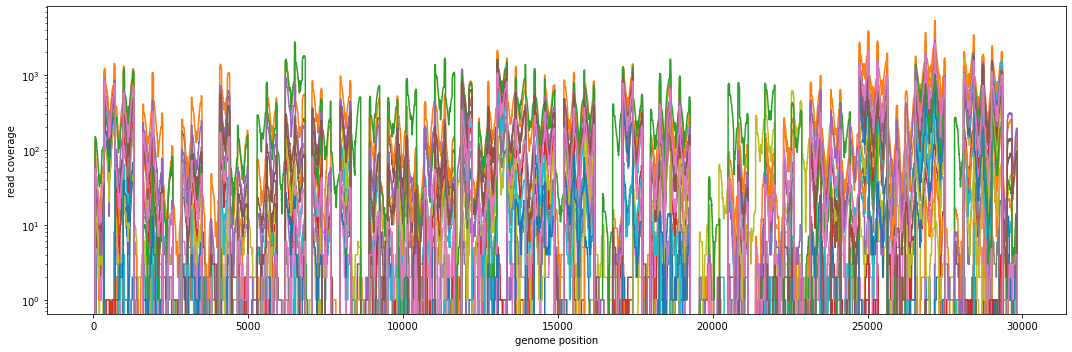

In [8]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
dir = './super_kit/'
for file in os.listdir(dir):
    #print(file)
    df = pd.read_table(f'{dir}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = file.split('_')[1]
    df['no_reads'].plot(logy=True, ax=ax, label=label)
    plt.xlabel('genome position')
    plt.ylabel('read coverage')
    #plt.legend()
plt.tight_layout()
plt.show()

In [2]:
fig = plt.figure(figsize=(15, 5))

Object `plt.figure` not found.


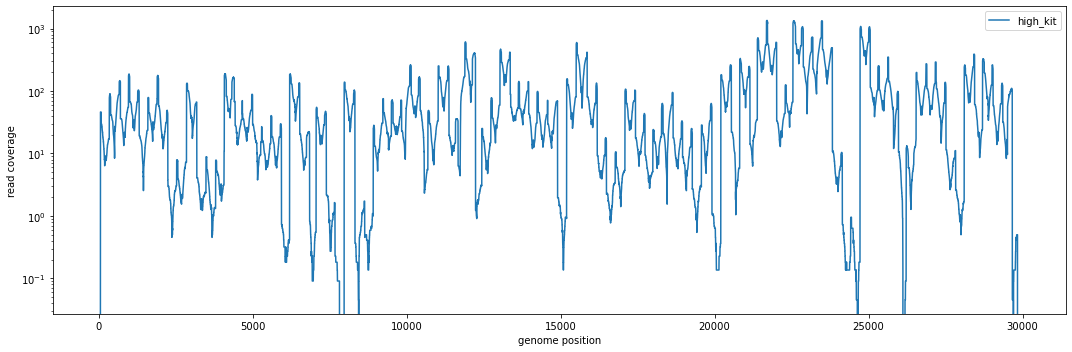

In [11]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
rep = './high_kit/' 
count = 0
reads_series = 0
for file in os.listdir(rep):
    count += 1
    df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = rep.lstrip('./').rstrip('/')
    reads_series += df['no_reads']
reads_series_avg = reads_series / count    
reads_series_avg.plot(logy=True, ax=ax, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.legend()
plt.tight_layout()
plt.show()

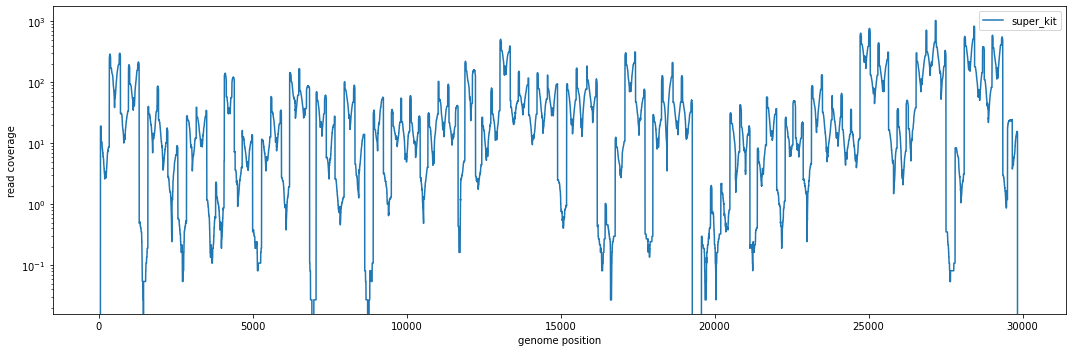

In [12]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
rep = './super_kit/' 
count = 0
reads_series = 0
for file in os.listdir(rep):
    count += 1
    df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = rep.lstrip('./').rstrip('/')
    reads_series += df['no_reads']
reads_series_avg = reads_series / count    
reads_series_avg.plot(logy=True, ax=ax, xtic label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.legend()
plt.tight_layout()
plt.show()

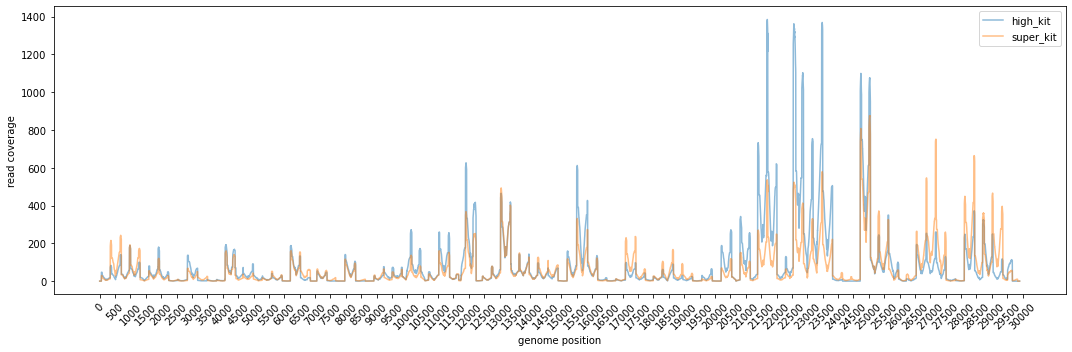

In [52]:
import numpy as np
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
reps = ['./high_kit/', './super_kit/'] 
count = 0
reads_series = 0
xtick = np.arange(0, 30500, 500)
for rep in reps:
    for file in os.listdir(rep):
        count += 1
        df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
        label = rep.lstrip('./').rstrip('/')
        reads_series += df['no_reads']
    reads_series_avg = reads_series / count 
    reads_series_avg.plot(logy=False, ax=ax, alpha=0.5, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.xticks(xtick, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('avg_kit_coverage.png')

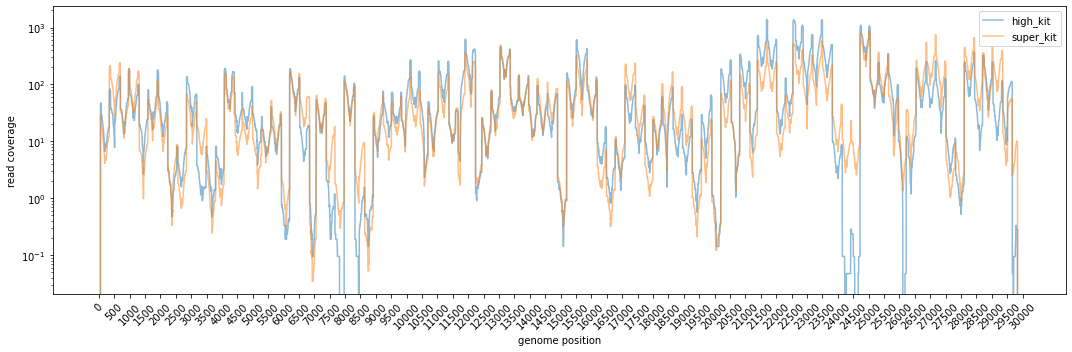

In [53]:
import numpy as np
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
reps = ['./high_kit/', './super_kit/'] 
count = 0
reads_series = 0
xtick = np.arange(0, 30500, 500)
for rep in reps:
    for file in os.listdir(rep):
        count += 1
        df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
        label = rep.lstrip('./').rstrip('/')
        reads_series += df['no_reads']
    reads_series_avg = reads_series / count 
    reads_series_avg.plot(logy=True, ax=ax, alpha=0.5, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.xticks(xtick, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('avg_kit_coverage2.png')

# $7^{th}$ April, 2021

# Primer depths

In [161]:
import pandas as pd

df = pd.read_table('/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25/COVC21058_S21_primers.dph')

In [194]:
df.head()

,Primer_Name,Read_Count
0,nCoV-2019_1_LEFT,3761
1,nCoV-2019_1_RIGHT,4284
2,nCoV-2019_2_LEFT,10140
3,nCoV-2019_2_RIGHT,9669
4,nCoV-2019_3_LEFT,6867


In [197]:
def primer_depth_v1(df):
    primer_names = (df['Primer_Name']
              .apply(lambda x: int(x.split('_')[1]))
              .to_frame())
    primer_names_cnt = (df.drop('Primer_Name', axis=1)
                        .merge(primer_names, left_index=True, right_index=True)
                        .sort_values('Primer_Name')
                        .set_index('Primer_Name').groupby('Primer_Name')
                        .mean())
    return primer_names_cnt

In [ ]:
def primer_depth(df):
    return (
        df.assign(Primer_Name = df['Primer_Name']
        .apply(lambda x: int(x.split('_')[1])))
        .set_index('Primer_Name')
        .groupby('Primer_Name')
        .mean()
    )


In [ ]:
primer_depth(df).head(20)

In [106]:
grp_by_prm = (df_t.drop('Primer_Name', axis=1)
.merge(primer, left_index=True, right_index=True)
.set_index('Primer_Name').groupby('Primer_Name'))#

<AxesSubplot:xlabel='Primer_Name'>

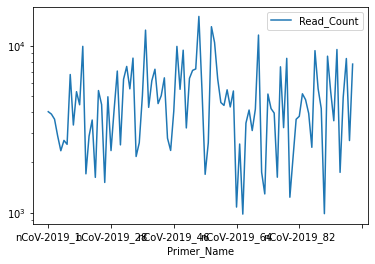

In [109]:
grp_by_prm.mean().plot(logy=True)

In [ ]:
# Instantiate a figure (canvas/plane)
fig = plt.figure()

# Add one axis at a time (cell/grid/subplot)
ax = fig.add_subplot(a, b, c) # a=number of axes; b=row; c=col

# Add multile (set of) axes at ago; uniformly distrubuted on canvas
ax = fig.subplots(nrows, ncols)

# Add multile (set of) axes at ago; arbitrarily distrubuted on canvas
ax = fig.add_axes([l,b,w,h])
'/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25/
# plt.subplot(), plt.subplots and plt.axes() simply wrap fig = plt.figure() correspondingly
# as in, one tone killing two birds
# i.e, creates figure in the background by default

plt.subplot()# returns an axes and a figure obj

plt.subplots()# returns a tuple with a figure and  multiple axes
fig, ax = plt.subplots()# which need to be unpacked

plt.axes()# returns one axes and a figure obj, with no args

In [254]:
import pandas as pd, os

def primer_depth(df):
    return (
        df.assign(Primer_Name = df['Primer_Name']
        .apply(lambda x: int(x.split('_')[1])))
        .set_index('Primer_Name')
        .groupby('Primer_Name')
        .mean()
    )

suffix = '_primers.dph'
base_dir = '/home/ouso/depth_files/batch2/test'
files = os.listdir(base_dir)
data = []
for file in files:
    if file.endswith(suffix):
        data.append(file)
    else: pass

df2 = pd.DataFrame()
for file in data:
    sample_name = os.path.basename(file).split('_')[0]
    sample_df = primer_depth(pd.read_table(f'{base_dir}/{file}'))
    sample_df2 = sample_df.rename(columns={'Read_Count': sample_name})
    df2 = df2.merge(sample_df2, how='outer', left_index=True, right_index=True)
df2.to_csv(f'{base_dir}/samples_primer_depths.csv')
     

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, os

def primer_depth(df):
    return (
        df.assign(Primer_Name = df['Primer_Name']
        .apply(lambda x: int(x.split('_')[1])))
        .set_index('Primer_Name')
        .groupby('Primer_Name')
        .mean()
    )

suffix = '_primers.dph'
base_dir = '/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25'
files = os.listdir(base_dir)
data = []
for file in files:
    if file.endswith(suffix):
        data.append(file)
    else: pass
a = len(data)
b, c = 1, -1
fig, axs = plt.subplots(a, b, figsize=(20,60)) 

xtick = np.arange(1, 99)

for file in data:
    c += 1
    sample_name = file.split('_')[0]
    sample_df = primer_depth(pd.read_table(f'{base_dir}/{file}'))
    sample_df2 = sample_df.rename(columns={'Read_Count': sample_name})
    sample_df2.plot(logy=True, ax=axs[c], sharex=True, sharey=False) 
    axs[c].legend(loc='lower left')
plt.xlabel('primers')
plt.ylabel('read coverage')
plt.xticks(xtick, rotation=45)
plt.tight_layout()
plt.show()
#fig.savesample_df2fig('avg_kit_coverage2.png')


# Read depthsalpha=0.5, alpha=0.5, alpha=0.5, alpha=0.5, alpha=0.5, 

no numeric data to plot for MoH-Cov-1_S1_prm-trm.dph or MoH-Cov-1_S1_msk.dph
no numeric data to plot for MoH-Cov-2_S2_prm-trm.dph or MoH-Cov-2_S2_msk.dph
no numeric data to plot for MoH-Cov-3_S3_prm-trm.dph or MoH-Cov-3_S3_msk.dph


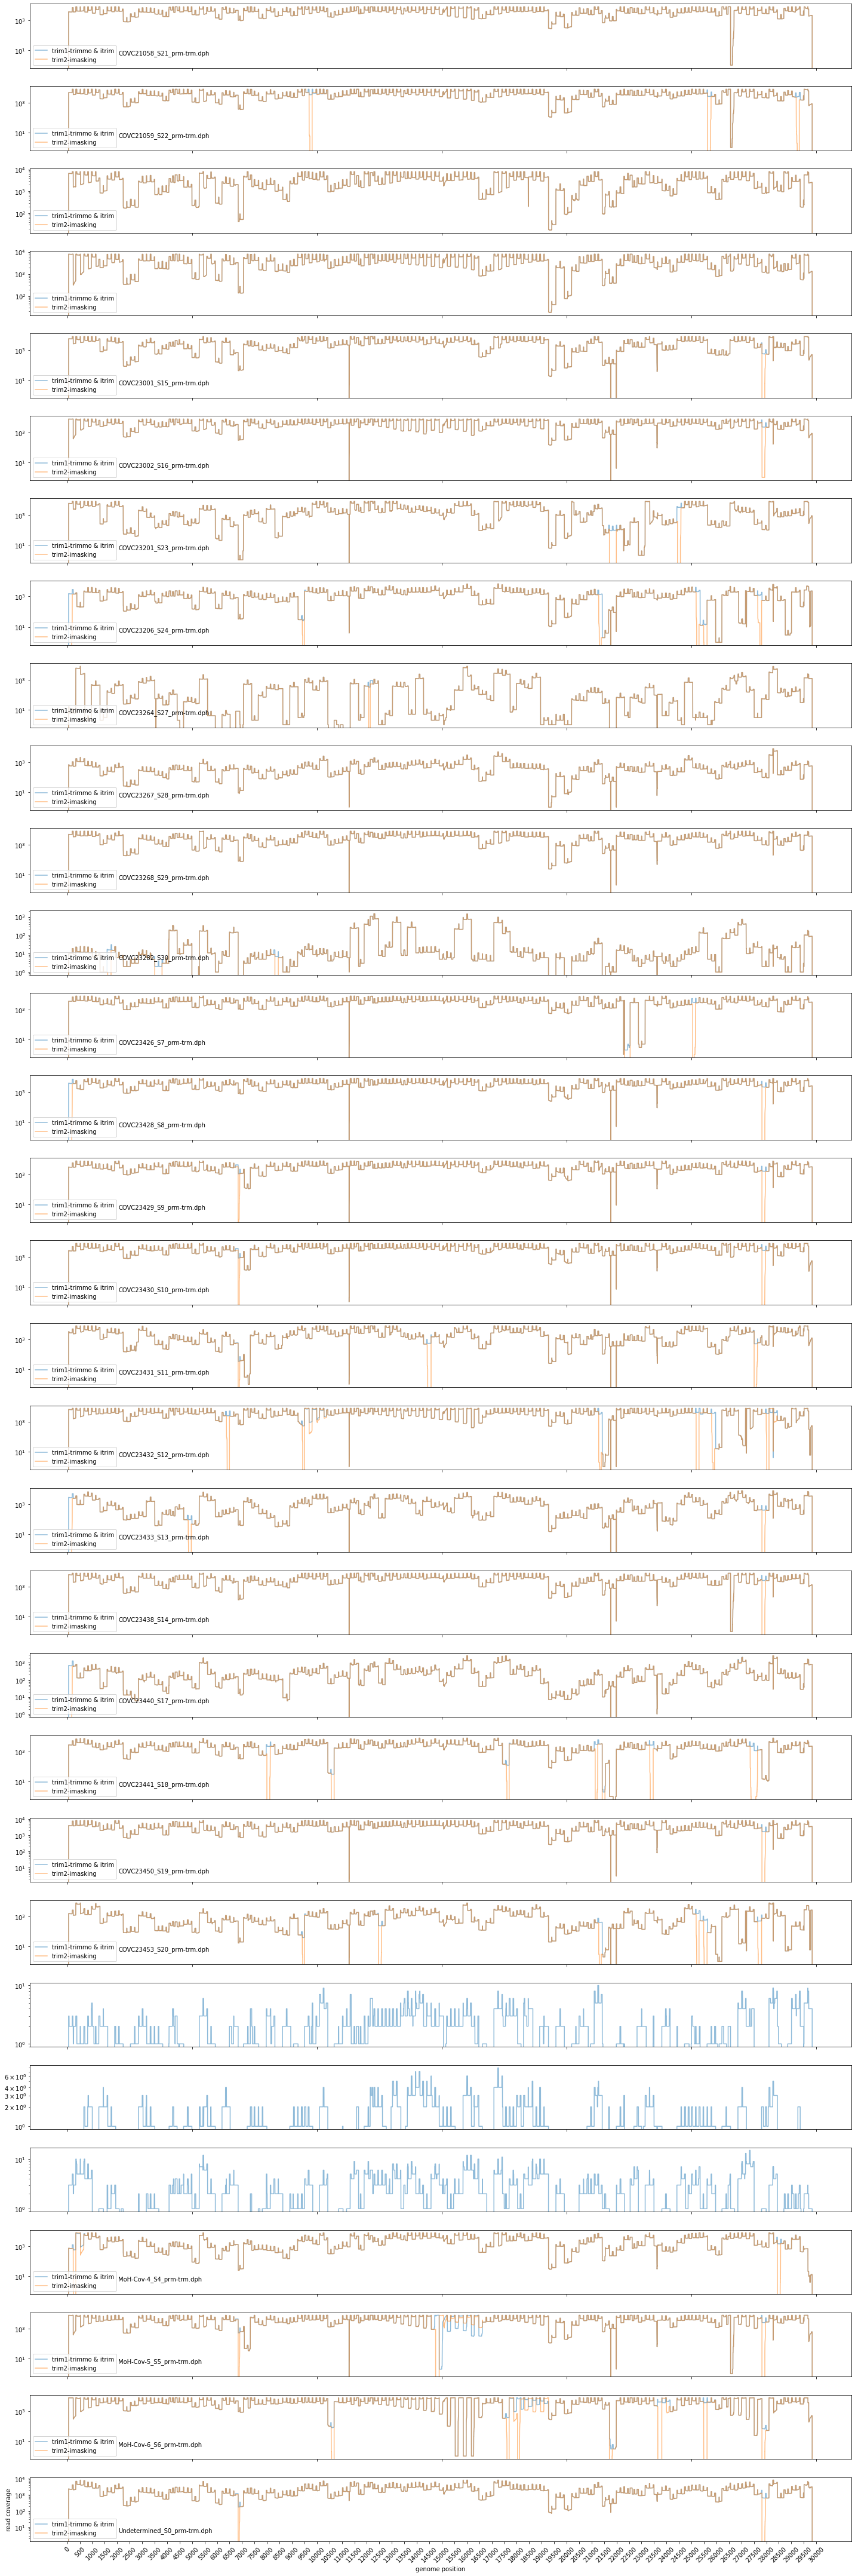

In [595]:
import numpy as np
import pandas as pd, os, matplotlib.pyplot as plt

suffix = '_prm-trm.dph'
suffix2 = '_msk.dph' 
base_dir = '/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25'
files = os.listdir(base_dir)
data = []
data2 = []
for file in files:
    if file.endswith(suffix):
        data.append(file)
    elif file.endswith(suffix2):
        data2.append(file)
    else: pass
a = len(data)
b, c = 1, -1

fig, axs = plt.subplots(a, b, figsize=(20, 60))
reps = [data, data2] 
count = 0
reads_series = 0
xtick = np.arange(0, 30500, 500)
for sam1, sam2 in zip(sorted(data), sorted(data2)):
#     print(sam1 + '\t\t' + sam2)
    c += 1
    if sam1.split('_')[:1] == sam2.split('_')[:1]: 
        try:
            
            df1 = pd.read_table(f'{base_dir}/{sam1}', sep='\t', names=['ref', 'pos', 'no_reads' ])
            df2 = pd.read_table(f'{base_dir}/{sam2}', sep='\t', names=['ref', 'pos', 'no_reads' ])
            label1 = 'trim1-trimmo & itrim'
            label2 = 'trim2-imasking'
            df1['no_reads'].plot(logy=True, ax=axs[c], sharex=True, alpha=0.5, label=label1)
            df2['no_reads'].plot(logy=True, ax=axs[c], sharex=True, alpha=0.5, label=label2)
            axs[c].legend(loc='lower left')
            axs[c].annotate(f'{sam1}', xy=(2050, 5))
            plt.ylabel('read coverage')
        except TypeError:
                print(f'no numeric data to plot for {sam1} or {sam2}')
        finally: pass
    else: print(f'Samples {sam1} and {sam2} are not mate pairs, they will not be plotted')
plt.xlabel('genome position')
plt.xticks(xtick, rotation=45)
plt.tight_layout()
plt.show()
#fig.savefig('avg_kit_coverage.png')

# Metadata Processing

In [436]:
import pandas as pd

df_b3 = pd.read_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/raw/Sequencing Samples_Batch 3.xlsx')
df_b3.head()

,Testing Lab,Case ID,Type of Case,Sample No,Sample name,ID,Age,Age Unit,Gender,Phone No,...,Confirmed case name,Quarantine facility,Have symptoms,Date of Onset of symptoms,Symptoms shown,Sample Type,Date of Sample Collection,Date Sample Received in the lab,Result,Lab confirmation date
0,ILRI,TIG/COV/1204,Initial,COVC23426,SUSAN WAMBUI,NaN,47.0,Years,F,723400477.0,...,NaN,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
1,ILRI,TIG/COV/1206,Initial,COVC23428,DAVID NJUGUNA,NaN,55.0,Years,M,NaN,...,NaN,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
2,ILRI,TIG/COV/1207,Initial,COVC23429,ERICK KARANJA,NaN,57.0,Years,M,NaN,...,NaN,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
3,ILRI,TIG/COV/1208,Initial,COVC23430,LAWRENCE NJUGUNA,NaN,53.0,Years,M,722725768.0,...,NaN,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
4,ILRI,KBU/RSC/970,Initial,COVC23431,ERIC KARANJA,28463133,30.0,Years,M,717657790.0,...,NaN,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,2021-03-02,Positive,2021-03-02


In [437]:
def tidy_header1(df):
    df.columns = [col.replace(' ', '_') for col in df.columns]
    return df
def drop_cols(df):
    keeps = ['Sample_No', 'Age', 'Age_Unit', 'Gender', 'Occupation'
         , 'Nationality', 'County_of_Residence', 'Has_travel_History'
         , 'Travel_from', 'Quarantine_facility', 'Have_symptoms'
         , 'Date_of_Onset_of_symptoms', 'Symptoms_shown', 'Sample_Type'
         , 'Date_of_Sample_Collection','Date_Sample_Received_in_the_lab', 'Result']
    return df[keeps]

In [438]:
cln_header = tidy_header1(df_b3)

In [439]:
sub_data = drop_cols(cln_header)

### Retrieve Ct values sheet

In [440]:
df_b3b = pd.read_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/raw/Sequencing Samples_Batch 3.xlsx', 'Combined Data', header=1)
df_b3b.head()

,Well,Well Position,Sample Name,N gene,ORF1ab Gene,Average Ct,Results,Quality,RNA Conc (ng/µl),Assay Name
0,1,A1,23426,16.339579,16.157328,16.248453,Positive,Strong positive,6.66,RNA HS
1,2,A2,23428,20.150341,20.696140,20.423241,Positive,Strong positive,7.94,RNA HS
2,3,A3,23429,13.701305,13.822499,13.761902,Positive,Strong positive,9.20,RNA HS
3,4,A4,23430,19.875237,21.516209,20.695723,Positive,Strong positive,6.06,RNA HS
4,5,A5,23431,22.992088,26.209766,24.600927,Positive,Strong positive,3.26,RNA HS


In [457]:
def get_cols(df, col_list):
    new_df = tidy_header1(df)
    return new_df[col_list]

In [442]:
z = get_cts(df_b3b, ['Sample_Name', 'Average_Ct'])
##############
ct_values = z.assign(Sample_Name = z['Sample_Name'].apply(lambda x: 'COVC' + str(x)))
##############
ct_values.head()

,Sample_Name,Average_Ct
0,COVC23426,16.248453
1,COVC23428,20.423241
2,COVC23429,13.761902
3,COVC23430,20.695723
4,COVC23431,24.600927


### Merge the sub_data and ct_values data

In [443]:
sub_data.head()

,Sample_No,Age,Age_Unit,Gender,Occupation,Nationality,County_of_Residence,Has_travel_History,Travel_from,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Result
0,COVC23426,47.0,Years,F,Secretary,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,Positive
1,COVC23428,55.0,Years,M,Business,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,Positive
2,COVC23429,57.0,Years,M,NaN,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,Positive
3,COVC23430,53.0,Years,M,Administration,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,Positive
4,COVC23431,30.0,Years,M,HCW,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,Positive


In [462]:
def data_mrg_cts(sub_data, ct_values):
    return sub_data.merge(ct_values, left_on='Sample_No', right_on='Sample_Name')
        
merged_metadata = data_mrg_cts(sub_data, ct_values).drop('Sample_No', axis=1)
#merged_data.to_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/batch3_mrg.xlsx')

In [466]:
merged_metadata.head()

,Age,Age_Unit,Gender,Occupation,Nationality,County_of_Residence,Has_travel_History,Travel_from,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Result,Sample_Name,Average_Ct
0,47.0,Years,F,Secretary,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,Positive,COVC23426,16.248453
1,55.0,Years,M,Business,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,Positive,COVC23428,20.423241
2,57.0,Years,M,NaN,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,Positive,COVC23429,13.761902
3,53.0,Years,M,Administration,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,Positive,COVC23430,20.695723
4,30.0,Years,M,HCW,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,Positive,COVC23431,24.600927


### Get Pangolin data

In [458]:
df_pango = pd.read_excel('/home/ouso/nextclade_files/batch2/nextclade_files_04-04-2021_11:25/consensus_pango.xlsx')
# retrieve cols Sequence_name and Lineage (func getget_cols replaces col names spaces with _)
cols = ['Sequence_name', 'Lineage']
df_pango_cln = get_cols(df_pango, cols)
df_pango_cln.head()

,Sequence_name,Lineage
0,COVC21058,B.1
1,COVC21059,B.1.596.1
2,COVC21060,B.1.549
3,COVC21062,B.1.143
4,COVC23001,B.1.1.7


### Get Nextclade data

In [459]:
df_nextc = pd.read_excel('/home/ouso/nextclade_files/batch2/nextclade_files_04-04-2021_11:25/04-04-2021_11:25_nxtc.xlsx')
# retrieve cols seqName and clade (func getget_cols replaces col names spaces with _)
cols = ['seqName', 'clade']
df_nextc_cln = get_cols(df_nextc, cols)
df_nextc_cln.head()

,seqName,clade
0,COVC21058,20C
1,COVC21059,20C
2,COVC21060,20A
3,COVC21062,20C
4,COVC23001,20I/501Y.V1


### Merge pango and nextclade data

In [472]:
pan_next = (df_pango_cln.merge(df_nextc_cln, left_on='Sequence_name', right_on='seqName')
            .drop('seqName', axis=1))
pan_next.head()

,Sequence_name,Lineage,clade
0,COVC21058,B.1,20C
1,COVC21059,B.1.596.1,20C
2,COVC21060,B.1.549,20A
3,COVC21062,B.1.143,20C
4,COVC23001,B.1.1.7,20I/501Y.V1


### Merge pango-nextc and merged_metadata data

In [476]:
complete_data = (pan_next.set_index('Sequence_name')
                 .merge(merged_metadata.set_index('Sample_Name'), how='left', left_index=True, right_index=True)
                 .reset_index())

In [477]:
complete_data

,Sequence_name,Lineage,clade,Age,Age_Unit,Gender,Occupation,Nationality,County_of_Residence,Has_travel_History,Travel_from,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Result,Average_Ct
0,COVC21058,B.1,20C,43.0,Years,M,MLT,Kenya,Kiambu,No,NaN,NaN,Yes,2020-11-07 00:00:00,NaN,NP Swab,2020-11-11,Positive,16.488002
1,COVC21059,B.1.596.1,20C,33.0,Years,F,HCW,Kenya,Kiambu,No,NaN,NaN,No,NaN,NaN,NP Swab,2020-11-11,Positive,21.401298
2,COVC21060,B.1.549,20A,40.0,Years,F,Business,Kenya,Nairobi,No,NaN,NaN,No,NaN,NaN,NP Swab,2020-11-11,Positive,27.878212
3,COVC21062,B.1.143,20C,58.0,Years,M,Business,Kenya,Kiambu,No,NaN,NaN,No,NaN,NaN,NP Swab,2020-11-11,Positive,24.958512
4,COVC23001,B.1.1.7,20I/501Y.V1,63.0,Years,F,NaN,Kenya,Nairobi,No,NaN,NaN,No,NaN,NaN,NP Swab,2021-02-09,Positive,25.527099
5,COVC23002,B.1.1.7,20I/501Y.V1,40.0,Years,F,NaN,Kenya,Nairobi,No,NaN,NaN,No,NaN,NaN,NP Swab,2021-02-09,Positive,22.440013
6,COVC23201,B.1.351,20H/501Y.V2,28.0,Years,M,NaN,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-01 00:00:00,CO;DIB;POLYURIA POLYDIPSIA,NP Swab,2021-02-12,Positive,22.958216
7,COVC23206,B.1.525,20A,65.0,Years,M,Farmer,Kenya,Kiambu,No,NaN,NaN,No,NaN,NaN,NP Swab,2021-02-10,Positive,22.064831
8,COVC23264,B.1,19A,17.0,Years,F,Student,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-02 00:00:00,ST;H,NP Swab,2021-02-16,Positive,30.058015
9,COVC23267,B.1.1.7,20I/501Y.V1,25.0,Years,F,NaN,Kenya,Kiambu,No,NaN,NaN,NaN,2021-02-14 00:00:00,FC;H,NP Swab,2021-02-16,Positive,30.345385


### Subsample brief data

In [563]:
cols = ['Sequence_name','Date_of_Sample_Collection', 'Lineage', 'clade', 'County_of_Residence', 
        'Gender', 'Nationality', 'Travel_from']
brief_data = complete_data[cols]
brief_data#.head()

,Sequence_name,Date_of_Sample_Collection,Lineage,clade,County_of_Residence,Gender,Nationality,Travel_from
0,COVC21058,2020-11-11,B.1,20C,Kiambu,M,Kenya,NaN
1,COVC21059,2020-11-11,B.1.596.1,20C,Kiambu,F,Kenya,NaN
2,COVC21060,2020-11-11,B.1.549,20A,Nairobi,F,Kenya,NaN
3,COVC21062,2020-11-11,B.1.143,20C,Kiambu,M,Kenya,NaN
4,COVC23001,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN
5,COVC23002,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN
6,COVC23201,2021-02-12,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,NaN
7,COVC23206,2021-02-10,B.1.525,20A,Kiambu,M,Kenya,NaN
8,COVC23264,2021-02-16,B.1,19A,Kiambu,F,Kenya,NaN
9,COVC23267,2021-02-16,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,NaN


### Get Variants of Concern data

In [547]:
moc_list = ['K417N', 'E484K', 'N501Y', 'D80A', 'A570D'] # MOH mutations of concern (spike only)
file_name = 's_gene_variant_anns.xlsx'

def get_mut_of_concern(ann_file_name, moc_list):
    import pandas as pd, glob, os

    def intersection(x, y):
        return list(set(x) & set(y))

    V2_i = moc_list
    file_name = ann_file_name

    file_path = glob.glob(f'/home/**/{file_name}', recursive=True)[0]
    #base_dir = os.path.dirname(file_path)
    df = pd.read_excel(f'{file_path}')
    moc = []
    sample_id = []
    for row in df.itertuples():
        substitutions = row.annotation.replace(' ', '').split(',')[1:-1]
        if len(V2_i) >= len(intersection(V2_i, substitutions)) > 0:
            intsct = intersection(V2_i, substitutions)
            sample_name = row.sample_name
            moc.append(intsct)
            sample_id.append(sample_name)
        else: pass 

    return pd.DataFrame({'Sample_ID': sample_id, 'Mut_of_Concern_(S)': moc})  neage', 'Next Clade', 'County', 'Gender', 'Nationality', 'Travel History', 'MoC-S-Protein']
brief_moc_data.columns = cols

In [562]:
moc_data = get_mut_of_concern(file_name, moc_list)
moc_data#.head()

,Sample_ID,Mut_of_Concern_(S)
0,COVC23431,"[A570D, N501Y]"
1,COVC23450,"[A570D, N501Y]"
2,COVC23001,"[A570D, N501Y]"
3,COVC23428,"[A570D, N501Y]"
4,COVC23432,[E484K]
5,COVC23429,"[A570D, N501Y]"
6,COVC23268,"[A570D, N501Y]"
7,MoH-Cov-3,"[A570D, N501Y]"
8,COVC23206,[E484K]
9,COVC23430,"[A570D, N501Y]"


### Merge brief_data and moc_data

In [587]:
brief_moc_data_mrg = brief_data.merge(moc_data, how='inner', left_on='Sequence_name', right_on='Sample_ID')
brief_moc_data_mrg#.head()

,Sequence_name,Date_of_Sample_Collection,Lineage,clade,County_of_Residence,Gender,Nationality,Travel_from,Sample_ID,Mut_of_Concern_(S)
0,COVC23001,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN,COVC23001,"[A570D, N501Y]"
1,COVC23002,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN,COVC23002,"[A570D, N501Y]"
2,COVC23201,2021-02-12,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,NaN,COVC23201,[K417N]
3,COVC23206,2021-02-10,B.1.525,20A,Kiambu,M,Kenya,NaN,COVC23206,[E484K]
4,COVC23267,2021-02-16,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,NaN,COVC23267,"[A570D, N501Y]"
5,COVC23268,2021-02-17,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN,COVC23268,"[A570D, N501Y]"
6,COVC23426,2021-03-02,B.1.351,20H/501Y.V2,Kiambu,F,Kenya,NaN,COVC23426,"[D80A, K417N]"
7,COVC23428,2021-03-02,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,NaN,COVC23428,"[A570D, N501Y]"
8,COVC23429,2021-03-02,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,NaN,COVC23429,"[A570D, N501Y]"
9,COVC23430,2021-03-02,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,NaN,COVC23430,"[A570D, N501Y]"


In [588]:
brief_moc_data = (brief_data.merge(moc_data, how='inner', left_on='Sequence_name', right_on='Sample_ID')
                  .drop('Sequence_name', axis=1)
                  .drop('Sample_ID', axis=1))

### Final policy brief report

In [589]:
cols = ['Date of Collection', 'Pango Lineage', 'Next Clade', 'County', 'Gender', 'Nationality', 'Travel History', 'MoC-S-Protein']
brief_moc_data.columns = cols
report = brief_moc_data
#report.to_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/Policy\ Brief-001.xlsx')
report

,Date of Collection,Pango Lineage,Next Clade,County,Gender,Nationality,Travel History,MoC-S-Protein
0,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN,"[A570D, N501Y]"
1,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN,"[A570D, N501Y]"
2,2021-02-12,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,NaN,[K417N]
3,2021-02-10,B.1.525,20A,Kiambu,M,Kenya,NaN,[E484K]
4,2021-02-16,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,NaN,"[A570D, N501Y]"
5,2021-02-17,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,NaN,"[A570D, N501Y]"
6,2021-03-02,B.1.351,20H/501Y.V2,Kiambu,F,Kenya,NaN,"[D80A, K417N]"
7,2021-03-02,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,NaN,"[A570D, N501Y]"
8,2021-03-02,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,NaN,"[A570D, N501Y]"
9,2021-03-02,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,NaN,"[A570D, N501Y]"


### Clean merged data